**Pressione SHIFT+ENTER para executar a célula**

# Alegrete

Este notebook fornece algumas visualizações para o trabalho de regressão linear. Para conseguir usar, implemente as funções no seu `alegrete.py` e tenha as bibliotecas `numpy` e `matplotlib` instaladas.

O notebook usa um conjunto de dados sintetico. Adapte-o para carregar e usar os dados do `alegrete.csv`.

### Imports das bibliotecas de plot e da solucao implementada

In [44]:
%matplotlib inline
from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

import alegrete

import pandas as pd
import numpy as np


### Visualizacao dos dados

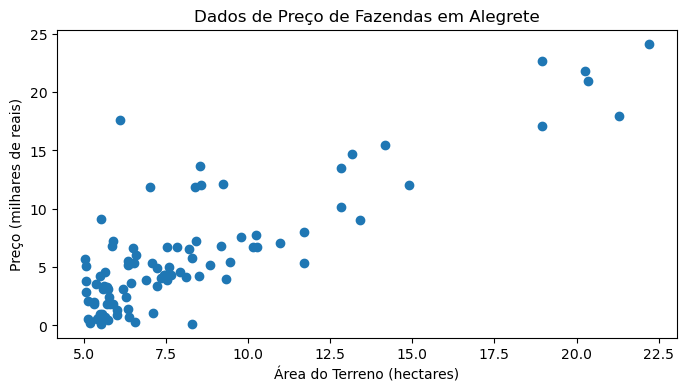

In [47]:
# dataset ficticio -- troque para carregar o alegrete.csv
dataset = pd.read_csv('alegrete.csv', header=None).to_numpy()
x = dataset[:, 0]
y = dataset[:, 1]

#Gráfico dos dados
plt.figure(figsize=(8, 4))
plt.scatter(x, y)
plt.xlabel('Área do Terreno (hectares)')
plt.ylabel('Preço (milhares de reais)')
plt.title('Dados de Preço de Fazendas em Alegrete')
plt.show()

### Execucao da regressao linear e calculo do EQM por epoca/iteracao

Considere o parâmetro b o coeficiente linear (theta_0, visto em aula) e w o coeficiente angular (theta_1, visto em aula).

EQM final: 10.751046411188709


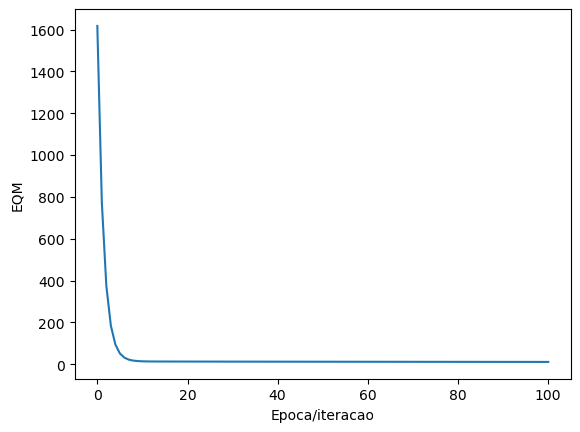

In [84]:
b_history, w_history = alegrete.fit(dataset, b=2, w=5,alpha=0.01, num_iterations=100)

# valores finais de theta0 e theta1
final_b, final_w = b_history[-1], w_history[-1]

mse_list = [alegrete.compute_mse(b, w, dataset) for b, w in zip(b_history, w_history)]
print(f"EQM final: {mse_list[-1]}")


plt.plot(mse_list)
plt.xlabel('Epoca/iteracao')
plt.ylabel('EQM')
plt.show()

### Plot da curva final

Curva encontrada: 0.8127993713286221*x + 0.056508223709861014


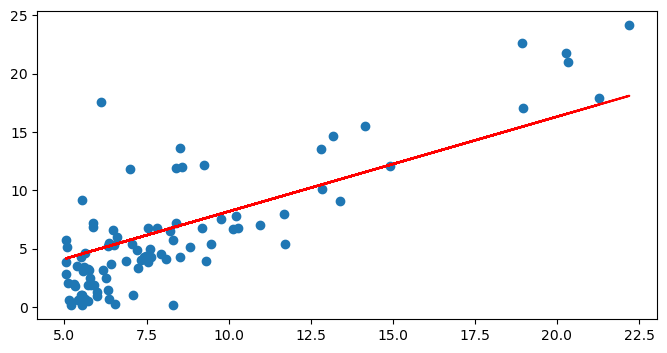

In [85]:
#Imprimir parâmetros otimizados
print (f'Curva encontrada: {final_w}*x + {final_b}')
x = dataset[:, 0]
y = dataset[:, 1]
#plota os dados
plt.figure(figsize=(8, 4))
plt.scatter(x, y)

# plota a curva de ajuste
pred = final_w*x + final_b
plt.plot(x, pred, c='r')
plt.show()




### Progresso da descida do gradiente com o número de iterações

Execute a celula e use os controles abaixo do grafico para visualizar o progresso do seu ajuste

Pode aparecer um grafico "extra" abaixo da animacao, apenas ignore.

In [86]:
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)
x = dataset[:, 0]
y = dataset[:, 1]

# conjunto de dados
ax.scatter(x, y)

# linha com os valores iniciais dos parametros
pred = w_history[0]*x + b_history[0]
line, = ax.plot(x, pred, '-',c='r')

# funcao que atualiza a linha a cada passo
def animate(i):
    pred = w_history[i] * x + b_history[i]
    line.set_ydata(pred)
    return line,

# mude interval para trocar a velocidade da animacao
ani = animation.FuncAnimation(fig, animate, frames=len(b_history), interval=20, save_count=50)
HTML(ani.to_jshtml())

C:\Users\gciru\AppData\Local\Temp\ipykernel_1432\1059322100.py:20: UserWarning: You passed in an explicit save_count=50 which is being ignored in favor of frames=101.
  ani = animation.FuncAnimation(fig, animate, frames=len(b_history), interval=20, save_count=50)
